<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/PracticeProblems/CTMC_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Continuous Time Markov Chains

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/pp-ctmc-intro.html). A copy of the prompt  can be found on github under [/PracticeProblems/Prompts](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems/Prompts) along with completed exercises under [/PracticeProblems](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems).

---

## Problems

###1.

$$\mathbf{Q} =
\begin{bmatrix}
& 1 & 0 & 1\\
2 &  & 2 & 0\\
0 & 3 &  & 3\\
4 & 0 & 4 & \\
\end{bmatrix}
$$

####a.

Find the diagonal entries of $\mathbf{Q}$

Row sums of Q = 0.

therefore

$\text{diagonal}(Q) = [-2 \quad -4 \quad -6 \quad -8]$

$$
\mathbf{Q} = \begin{bmatrix}
-2 & 1 & 0 & 1\\
2 & -4 & 2 & 0\\
0 & 3 & -6 & 3\\
4 & 0 & 4 & -8\\
\end{bmatrix}
$$

####b.

Explain in full detail how you could simulate the process for a long time using only (1) a coin, and (2) an Exponential(1) spinner.

It looks like from the rate matrix you only ever go to two states from the one you are in. Therefore you can flip a coin to determine what state you transition to based on current state. You can use the exponential spinner to determine how long you spend in a given state for a certain time period.

###2.

A system is composed of $5$ machines. A machine operates for an Exponentially distributed amount of time with rate $\mu=1$ and then fails. When a machine fails it undergoes repair; repair times are Exponential distributed with rate $\lambda=2$. Let $X(t)$ represent the number of machines operating at time $t$; then $\{X(t)\}$ is a CTMC. Find the rate matrix of the CTMC.

5 machines, $X_t$ is amount of machines working at time t.

If all machines are working we can transition down to 4 machines. It isan exponental race between the 5 machines and results in rate $5\mu$.

We will assume there is not a queue for the repairs and that the repairs start right after failure.

If 4 machines are working and 1 is broken, then it will be repaired at  rate of $\lambda$ while there is still a race for machines breaking down with a rate of $4\mu$.

If all machines are broken then they will be repaired at a rate of $5\lambda$.

$$
\mathbf{Q} = \begin{bmatrix}
-5\lambda & 5\lambda & 0 & 0 & 0 & 0\\
\mu & -(\mu+4\lambda) & 4\lambda & 0 & 0 & 0\\
0 & 2\mu & -(2\mu+3\lambda) & 3\lambda & 0 & 0\\
0 & 0 & 3\mu & -(3\mu+2\lambda) & 2\lambda & 0\\
0 & 0 & 0 & 4\mu & -(4\mu+\lambda) & \lambda\\
0 & 0 & 0 & 0 & 5μ & -5\mu\\
\end{bmatrix}
$$

In [4]:
import numpy as np

# Define parameters
mu = 1  # rate of machine failure
lambda_ = 2  # rate of machine repair
num_machines = 5  # total number of machines

# Construct the rate matrix Q
Q = np.zeros((num_machines + 1, num_machines + 1))

# Populate diagonal elements
for i in range(num_machines):
    Q[i, i] = -mu * (num_machines - i) - lambda_ * i
Q[num_machines, num_machines] = -lambda_ * num_machines

# Populate off-diagonal elements
for i in range(num_machines):
    Q[i, i + 1] = mu * (num_machines - i)
    Q[i + 1, i] = lambda_ * (i + 1)

print("Rate matrix Q:")
print(Q)


Rate matrix Q:
[[ -5.   5.   0.   0.   0.   0.]
 [  2.  -6.   4.   0.   0.   0.]
 [  0.   4.  -7.   3.   0.   0.]
 [  0.   0.   6.  -8.   2.   0.]
 [  0.   0.   0.   8.  -9.   1.]
 [  0.   0.   0.   0.  10. -10.]]


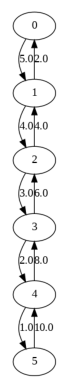

In [6]:
import numpy as np
from graphviz import Digraph
import os
import matplotlib.pyplot as plt

def create_state_diagram(rate_matrix, state_labels=None):
    """
    Creates a state diagram using Graphviz from a rate matrix.

    Args:
    - rate_matrix: NumPy array representing the rate matrix
    - state_labels: Optional list of state labels

    Returns:
    - graph: Graphviz Digraph object representing the state diagram
    """
    num_states = rate_matrix.shape[0]

    # Initialize the Digraph object
    graph = Digraph(format='png')

    # Add nodes
    for i in range(num_states):
        if state_labels is not None:
            graph.node(str(i), label=state_labels[i])
        else:
            graph.node(str(i))

    # Add edges
    for i in range(num_states):
        for j in range(num_states):
            if rate_matrix[i, j] > 0:
                graph.edge(str(i), str(j), label=str(rate_matrix[i, j]))

    return graph

state_diagram = create_state_diagram(Q)
state_diagram.render('state_diagram', format='png', cleanup=True)

img = plt.imread('state_diagram.png')
plt.axis("off")
plt.imshow(img)

---

## Reflection

With each Practice Problem submission, you should also take a few minutes to reflect on the practice problems and related material and thoughtfully respond to the following.

1. Write a sentence or two summarizing - in your own words - one big idea from this material.
2. Describe one particular aspect of this material that you found challenging and why. Then describe how you dealt with the challenge, or what you can do to deal with the challenge.
3. Write at least one specific question you have about this material. I strongly encourage you to post your questions directly in Discord as that's where I'll respond to questions. That is, if you really want an answer to your question - which I hope you do! - please post the question directly in Discord.

The big idea from this section is how markov chain properties are constructed from a continuous time domain. Here we learn what the transition matricies look like and how to construct and use rate matricies.
I definitly struggled with setting up 2, not sure if it is right. I will want to check with someone definitly.